# Importing Libraries

In [1]:
import os
import zipfile
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Download Dataset

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse_or_human.zip

--2021-09-15 15:19:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse_or_human.zip’

/tmp/horse_or_human 100%[===================>] 142.65M   139MB/s    in 1.0s    

2021-09-15 15:19:05 (139 MB/s) - ‘/tmp/horse_or_human.zip’ saved [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-09-15 15:19:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  55.2MB/s    in 0.2s    

2021-09-15 15:19:06 (55.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



# Exploring Dataset

In [4]:
zip_file = '/tmp/horse_or_human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/horse_or_human')

zip_file = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/validation-horse_or_human')

zip_ref.close()

In [5]:
base_dir = '/tmp/horse_or_human/'
val_base_dir = '/tmp/validation-horse_or_human/'
print(base_dir)
print(val_base_dir)

train_horse_dir = os.path.join(base_dir, 'horses/')
print(train_horse_dir)
train_human_dir = os.path.join(base_dir, 'humans/')
print(train_human_dir)

validation_horse_dir = os.path.join(val_base_dir, 'horses/')
print(validation_horse_dir)
validation_human_dir = os.path.join(val_base_dir, 'humans/')
print(validation_human_dir)

/tmp/horse_or_human/
/tmp/validation-horse_or_human/
/tmp/horse_or_human/horses/
/tmp/horse_or_human/humans/
/tmp/validation-horse_or_human/horses/
/tmp/validation-horse_or_human/humans/


In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse31-3.png', 'horse03-8.png', 'horse44-1.png', 'horse27-4.png', 'horse04-0.png', 'horse44-2.png', 'horse46-8.png', 'horse19-9.png', 'horse33-8.png', 'horse14-6.png']
['human02-08.png', 'human01-10.png', 'human09-16.png', 'human01-11.png', 'human06-23.png', 'human11-18.png', 'human15-01.png', 'human14-08.png', 'human13-26.png', 'human16-16.png']
['horse4-000.png', 'horse4-345.png', 'horse1-298.png', 'horse4-202.png', 'horse4-495.png', 'horse2-269.png', 'horse2-383.png', 'horse1-000.png', 'horse3-141.png', 'horse1-241.png']
['valhuman05-13.png', 'valhuman04-14.png', 'valhuman05-07.png', 'valhuman02-12.png', 'valhuman05-16.png', 'valhuman01-09.png', 'valhuman02-22.png', 'valhuman02-16.png', 'valhuman01-05.png', 'valhuman01-17.png']


In [8]:
total_train_horse_image = len(train_horse_names)
total_train_human_image = len(train_human_names)

print("Total train horse images: ", total_train_horse_image)
print("Total train human images: ", total_train_human_image)

Total train horse images:  500
Total train human images:  527


In [9]:
validation_train_horse_image = len(validation_horse_names)
validation_train_human_image = len(validation_human_names)

print("Total validation horse images: ", validation_train_horse_image)
print("Total validation human images: ", validation_train_human_image)

Total validation horse images:  128
Total validation human images:  128


# Preprocess Data

In [10]:
# instantiate an object with rescale images between 0 and 1
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# flow training images from directory in batches of 128
train_generator = train_data_gen.flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     batch_size=128,
                                                     class_mode='binary')


Found 1027 images belonging to 2 classes.


In [11]:
# instantiate an object with rescale images between 0 and 1
validation_data_gen = ImageDataGenerator(rescale=1/255)

# flow training images from directory in batches of 128
validation_generator = validation_data_gen.flow_from_directory(directory=val_base_dir,
                                                     target_size=(300, 300),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 256 images belonging to 2 classes.


# Design and Train the Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=8,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/100
8/8 [==============================] - 56s 3s/step - loss: 0.8323 - accuracy: 0.4905 - val_loss: 0.7958 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 23s 3s/step - loss: 0.7100 - accuracy: 0.5673 - val_loss: 0.6066 - val_accuracy: 0.7305
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 0.7264 - accuracy: 0.6318 - val_loss: 0.6073 - val_accuracy: 0.6719
Epoch 4/100
8/8 [==============================] - 23s 3s/step - loss: 0.9007 - accuracy: 0.6641 - val_loss: 1.0108 - val_accuracy: 0.5195
Epoch 5/100
8/8 [==============================] - 23s 3s/step - loss: 0.5488 - accuracy: 0.7052 - val_loss: 0.7064 - val_accuracy: 0.5195
Epoch 6/100
8/8 [==============================] - 23s 3s/step - loss: 0.6341 - accuracy: 0.7308 - val_loss: 1.0931 - val_accuracy: 0.5156
Epoch 7/100
8/8 [==============================] - 23s 3s/step - loss: 0.4607 - accuracy: 0.7775 - val_loss: 1.7968 - val_accuracy: 0.5430
Epoch 8/100
8/8 [==========

# Evaluation Loss & Accuracy

In [15]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 135ms/step - loss: 1.0487 - accuracy: 0.7383


[1.048674464225769, 0.73828125]

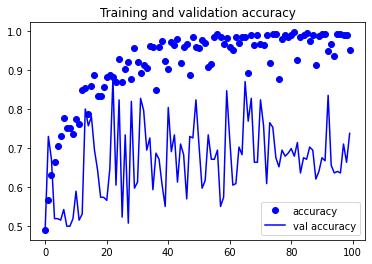

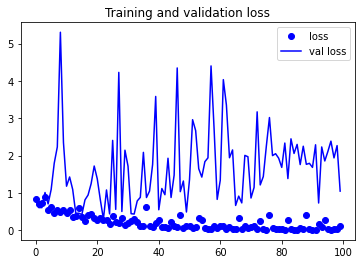

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'bo', label='accuracy')
plt.plot  ( epochs, val_acc , 'b', label='val accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'bo', label='loss')
plt.plot  ( epochs, val_loss , 'b', label='val loss')
plt.title ('Training and validation loss'   )
plt.legend()